In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
import plotly 
import plotly.express as px
import seaborn as sns 

## Import Libraries

In [2]:
df = pd.read_csv("startup_funding.csv")
df.head(5)

,SNo,Date,StartupName,IndustryVertical,SubVertical,CityLocation,InvestorsName,InvestmentType,AmountInUSD,Remarks
0,0,01/08/2017,TouchKin,Technology,Predictive Care Platform,Bangalore,Kae Capital,Private Equity,"1,300,000",NaN
1,1,02/08/2017,Ethinos,Technology,Digital Marketing Agency,Mumbai,Triton Investment Advisors,Private Equity,NaN,NaN
2,2,02/08/2017,Leverage Edu,Consumer Internet,Online platform for Higher Education Services,New Delhi,"Kashyap Deorah, Anand Sankeshwar, Deepak Jain,...",Seed Funding,NaN,NaN
3,3,02/08/2017,Zepo,Consumer Internet,DIY Ecommerce platform,Mumbai,"Kunal Shah, LetsVenture, Anupam Mittal, Hetal ...",Seed Funding,"500,000",NaN
4,4,02/08/2017,Click2Clinic,Consumer Internet,healthcare service aggregator,Hyderabad,"Narottam Thudi, Shireesh Palle",Seed Funding,"850,000",NaN


In [3]:
df.tail(3)

,SNo,Date,StartupName,IndustryVertical,SubVertical,CityLocation,InvestorsName,InvestmentType,AmountInUSD,Remarks
2369,2369,30/01/2015,Mad Street Den,NaN,NaN,NaN,"Exfinity Fund, GrowX Ventures.",Private Equity,"1,500,000",NaN
2370,2370,30/01/2015,Simplotel,NaN,NaN,NaN,MakeMyTrip,Private Equity,NaN,"Strategic Funding, Minority stake"
2371,2371,31/01/2015,couponmachine.in,NaN,NaN,NaN,UK based Group of Angel Investors,Seed Funding,"140,000",NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2372 entries, 0 to 2371
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   SNo               2372 non-null   int64 
 1   Date              2372 non-null   object
 2   StartupName       2372 non-null   object
 3   IndustryVertical  2201 non-null   object
 4   SubVertical       1436 non-null   object
 5   CityLocation      2193 non-null   object
 6   InvestorsName     2364 non-null   object
 7   InvestmentType    2371 non-null   object
 8   AmountInUSD       1525 non-null   object
 9   Remarks           419 non-null    object
dtypes: int64(1), object(9)
memory usage: 185.4+ KB


In [5]:
df.shape

(2372, 10)

In [6]:
df.columns

Index(['SNo', 'Date', 'StartupName', 'IndustryVertical', 'SubVertical',
       'CityLocation', 'InvestorsName', 'InvestmentType', 'AmountInUSD',
       'Remarks'],
      dtype='object')

In [7]:
df['StartupName'].unique()

array(['TouchKin', 'Ethinos', 'Leverage Edu', ..., 'Graphene',
       'Simplotel', 'couponmachine.in'], dtype=object)

In [8]:
df['StartupName'].unique().shape

(2001,)

In [9]:
df['StartupName'].unique().tolist()

['TouchKin',
 'Ethinos',
 'Leverage Edu',
 'Zepo',
 'Click2Clinic',
 'Billion Loans',
 'Ecolibriumenergy',
 'Droom',
 'Jumbotail',
 'Moglix',
 'Timesaverz',
 'Minjar',
 'MyCity4kids',
 'Clip App',
 'Upwardly.in',
 'Autorox.co',
 'Fabogo',
 'Flickstree',
 'Design Cafe',
 'Innoviti',
 'VDeliver',
 'Bottr.me',
 'Arcatron',
 'QwikSpec',
 'Chumbak',
 'Increff',
 'Vayana',
 'MObiquest',
 'Ambee',
 'Ideal Insurance',
 'Hypernova Interactive',
 'Rentomojo',
 'AirCTO',
 'Playablo',
 'Trupay',
 'Brick2Wall',
 'FableStreet',
 'Monsoon Fintech',
 'MonkeyBox',
 'Noticeboard',
 'Byju’s',
 'Creator’s Gurukul',
 'Fab Hotels',
 'ThinkerBell',
 '1mg',
 'Jhakaas',
 'BigStylist',
 'Gympik.com',
 'Tripeur',
 'RentOnGo',
 'Goomo',
 'MaxMyWealth',
 'Spinny',
 'Healthbuds',
 'Ftcash',
 'BHIVE Workspace',
 'wayForward',
 'GyanDhan',
 'Hungry Foal',
 'ZipLoan',
 'GrowFitter',
 'Stratfit',
 'Multiplier Solutions',
 'ABI Health',
 'Stockal',
 'Guidoo',
 'eSahai.in',
 'Loanmeet',
 'LendingKart',
 'Boxx.ai',
 'PeeS

## Data Cleaning

In [10]:
df.rename(columns= {'StartupName': 'Startup Name','SNo' : 'Sr.No.' , 'IndustryVertical' : 'Industry vertical',
                         'SubVertical' : 'Sub vertical', 'CityLocation' : 'City',
                           'InvestorsName' : 'Investors', 'AmountInUSD' : 'Amount'}, inplace=True)

In [11]:
df.head(5)

,Sr.No.,Date,Startup Name,Industry vertical,Sub vertical,City,Investors,InvestmentType,Amount,Remarks
0,0,01/08/2017,TouchKin,Technology,Predictive Care Platform,Bangalore,Kae Capital,Private Equity,"1,300,000",NaN
1,1,02/08/2017,Ethinos,Technology,Digital Marketing Agency,Mumbai,Triton Investment Advisors,Private Equity,NaN,NaN
2,2,02/08/2017,Leverage Edu,Consumer Internet,Online platform for Higher Education Services,New Delhi,"Kashyap Deorah, Anand Sankeshwar, Deepak Jain,...",Seed Funding,NaN,NaN
3,3,02/08/2017,Zepo,Consumer Internet,DIY Ecommerce platform,Mumbai,"Kunal Shah, LetsVenture, Anupam Mittal, Hetal ...",Seed Funding,"500,000",NaN
4,4,02/08/2017,Click2Clinic,Consumer Internet,healthcare service aggregator,Hyderabad,"Narottam Thudi, Shireesh Palle",Seed Funding,"850,000",NaN


In [12]:
# droping 'Remarks' column

df.drop(columns=['Remarks'],inplace=True)

In [13]:
# droping 'Sr.No.' column

df.drop(columns=['Sr.No.'],inplace=True)

In [14]:
# Checking missing values

df.isnull().sum()

Date                   0
Startup Name           0
Industry vertical    171
Sub vertical         936
City                 179
Investors              8
InvestmentType         1
Amount               847
dtype: int64

In [15]:
df['Amount']

0       1,300,000
1             NaN
2             NaN
3         500,000
4         850,000
          ...    
2367    4,500,000
2368      825,000
2369    1,500,000
2370          NaN
2371      140,000
Name: Amount, Length: 2372, dtype: object

In [16]:
# Cleaning the 'Amount' column by removing non-numeric characters

df['Amount']= df['Amount'].apply(lambda x: re.sub(r'[^0-9.]', '', str(x)))

In [17]:
# Converting the 'Amount' column to float

df['Amount'] = df['Amount'].apply(lambda x: float(x) if x else float('nan'))

In [18]:
df['Amount']

0       1300000.0
1             NaN
2             NaN
3        500000.0
4        850000.0
          ...    
2367    4500000.0
2368     825000.0
2369    1500000.0
2370          NaN
2371     140000.0
Name: Amount, Length: 2372, dtype: float64

In [19]:
# Drop rows that have missing values

# df.dropna(inplace=True)

In [20]:
df.isnull().sum()

Date                   0
Startup Name           0
Industry vertical    171
Sub vertical         936
City                 179
Investors              8
InvestmentType         1
Amount               847
dtype: int64

In [21]:
df.head()

,Date,Startup Name,Industry vertical,Sub vertical,City,Investors,InvestmentType,Amount
0,01/08/2017,TouchKin,Technology,Predictive Care Platform,Bangalore,Kae Capital,Private Equity,1300000.0
1,02/08/2017,Ethinos,Technology,Digital Marketing Agency,Mumbai,Triton Investment Advisors,Private Equity,NaN
2,02/08/2017,Leverage Edu,Consumer Internet,Online platform for Higher Education Services,New Delhi,"Kashyap Deorah, Anand Sankeshwar, Deepak Jain,...",Seed Funding,NaN
3,02/08/2017,Zepo,Consumer Internet,DIY Ecommerce platform,Mumbai,"Kunal Shah, LetsVenture, Anupam Mittal, Hetal ...",Seed Funding,500000.0
4,02/08/2017,Click2Clinic,Consumer Internet,healthcare service aggregator,Hyderabad,"Narottam Thudi, Shireesh Palle",Seed Funding,850000.0


## EDA

In [22]:
# convert "Date" coloumn into datetime format

df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y' , errors='coerce')

In [23]:
df.dropna(subset=['Date'],inplace=True)

In [24]:
df['Year'] = df['Date'].dt.year
df['Year']

0       2017
1       2017
2       2017
3       2017
4       2017
        ... 
2367    2015
2368    2015
2369    2015
2370    2015
2371    2015
Name: Year, Length: 2366, dtype: int64

In [25]:
df['Year'].unique()

array([2017, 2016, 2015])

how much investers can funding on a particular startup companies ?

<Axes: title={'center': 'Investers funding'}, xlabel='Amount', ylabel='Count'>

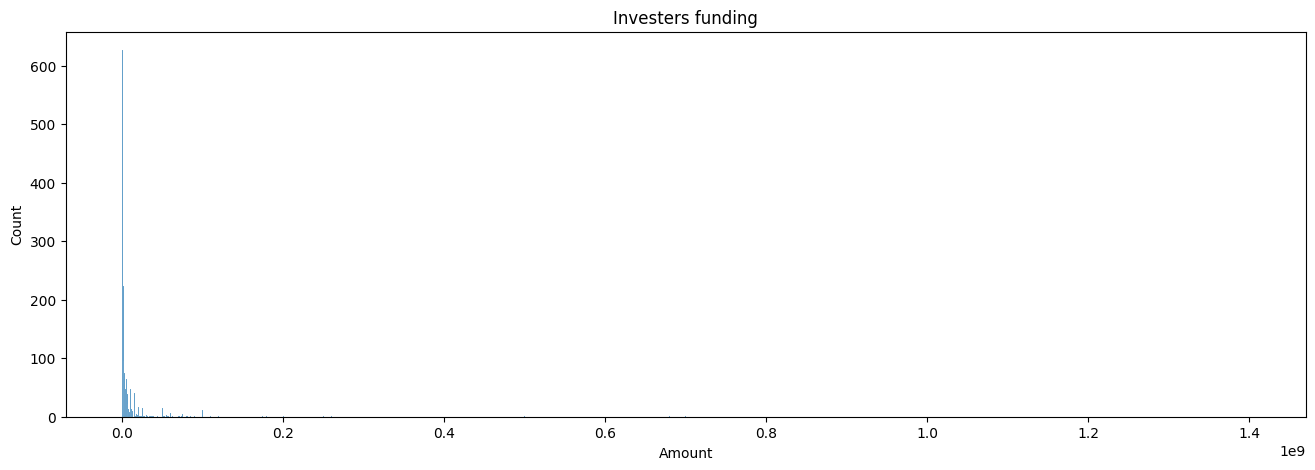

In [26]:
plt.figure(figsize=(16,5))
plt.title("Investers funding")
sns.set_style('whitegrid')
sns.histplot(data=df, x="Amount")

How does the funding ecosystem change with time?

In [27]:
# Grouping the data year 

funding_year = df.groupby('Year')['Amount'].sum()
funding_year

Year
2015    8.669042e+09
2016    3.828089e+09
2017    5.846276e+09
Name: Amount, dtype: float64

Do cities play a major role in funding?

In [28]:
# grouping 'City column And Calculate total funding amount

funding_city = df.groupby('City')['Amount'].sum().sort_values(ascending=False)
funding_city

City
Bangalore             8.383774e+09
New Delhi             2.750248e+09
Mumbai                2.340564e+09
Gurgaon               2.067822e+09
Chennai               4.111050e+08
                          ...     
Karur                 0.000000e+00
Hubli                 0.000000e+00
Goa/Hyderabad         0.000000e+00
Chennai/ Singapore    0.000000e+00
bangalore             0.000000e+00
Name: Amount, Length: 71, dtype: float64

In [29]:
top15cities = funding_city.head(15)

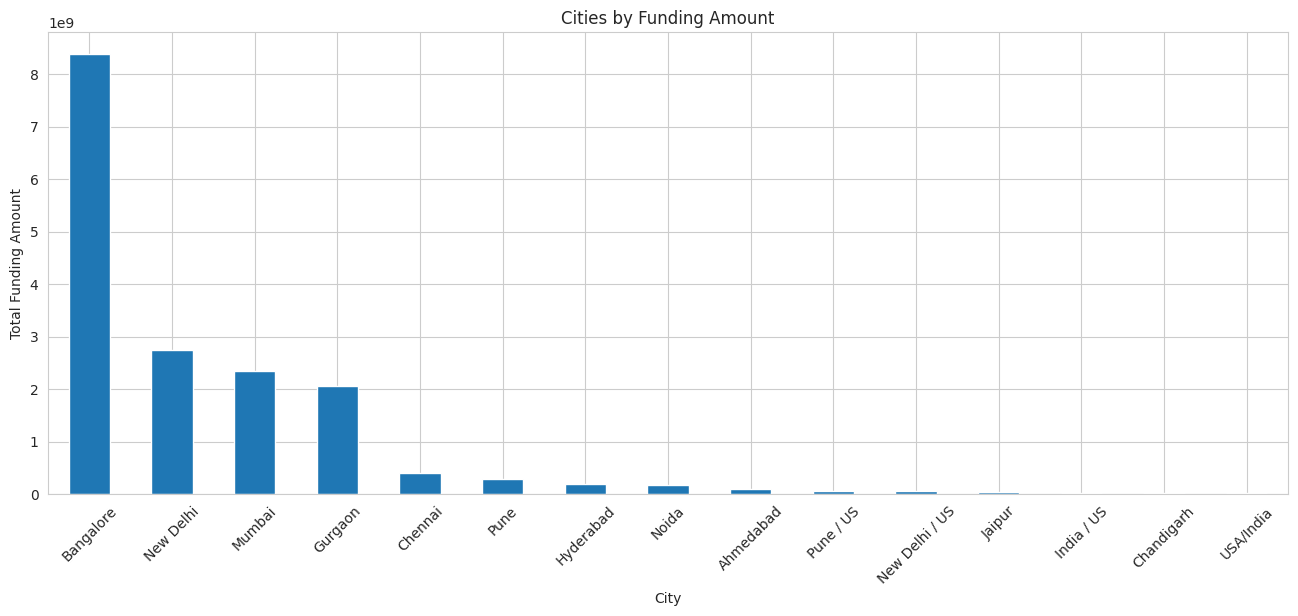

In [30]:
plt.figure(figsize=(16, 6))
top15cities.plot(kind='bar')
plt.title('Cities by Funding Amount')
plt.xlabel('City')
plt.ylabel('Total Funding Amount')
plt.xticks(rotation=45)
plt.show()

Which industries are favored by investors for funding?

In [31]:
funding_industry = df.groupby('Industry vertical')['Amount'].sum().sort_values(ascending=False)
funding_industry

Industry vertical
Consumer Internet                        3.797089e+09
eCommerce                                2.442712e+09
ECommerce                                1.834398e+09
Technology                               1.103594e+09
Online Marketplace                       7.000000e+08
                                             ...     
Online Reputation Management Platform    0.000000e+00
Online Renting platform                  0.000000e+00
Online Purchase rewards app              0.000000e+00
Doctor consultancy Mobile App            0.000000e+00
360-degree view creating platform        0.000000e+00
Name: Amount, Length: 742, dtype: float64

In [32]:
top15industry = funding_industry.head(15)

In [33]:
import ipywidgets as widgets

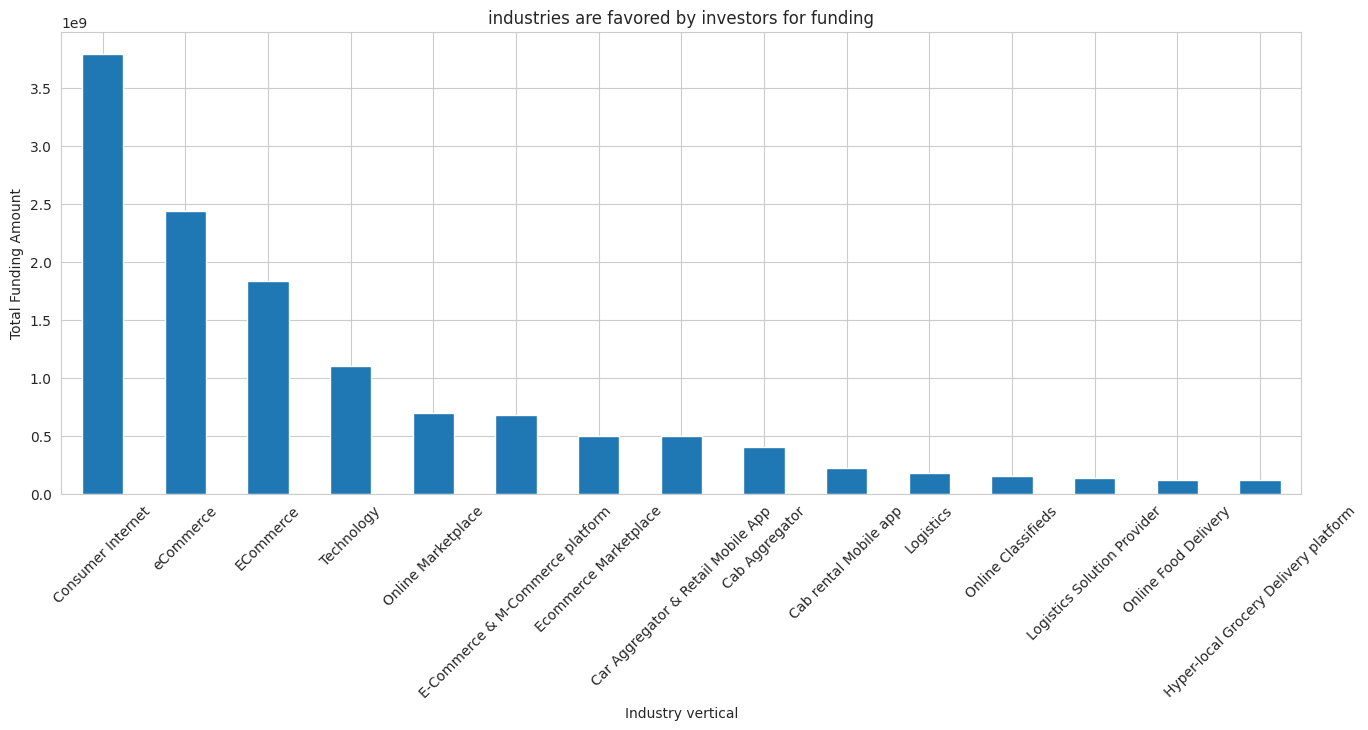

In [34]:
plt.figure(figsize=(16, 6))
top15industry.plot(kind='bar')
plt.title('industries are favored by investors for funding')
plt.xlabel('Industry vertical')
plt.ylabel('Total Funding Amount')
plt.xticks(rotation=45)
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

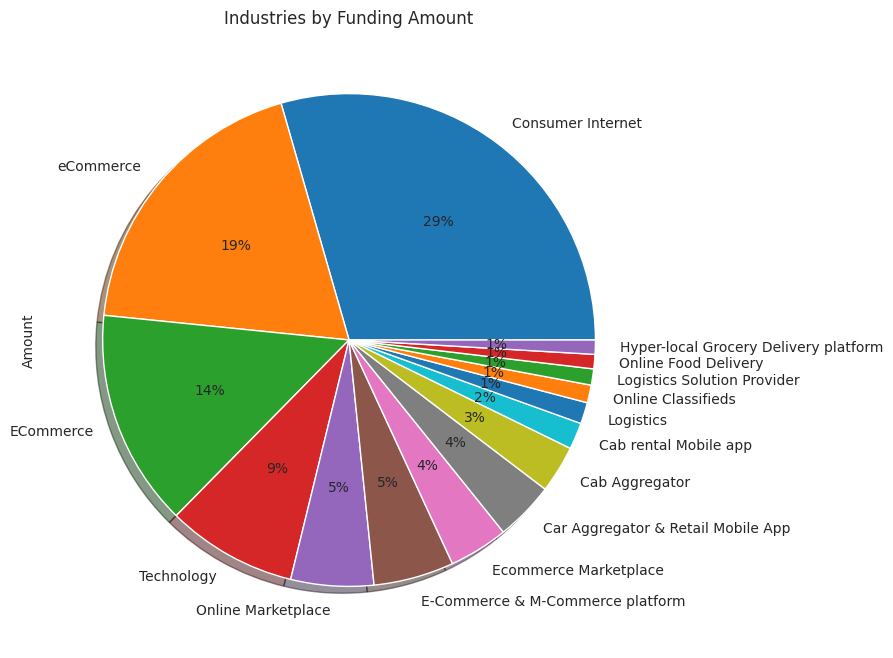

In [35]:
plt.figure(figsize=(18,8))
top15industry.plot(kind='pie',shadow=True,autopct='%.0f%%')
plt.title('Industries by Funding Amount')
plt.show

The important investors in the Indian ecosystem

In [36]:
df.head(2)

,Date,Startup Name,Industry vertical,Sub vertical,City,Investors,InvestmentType,Amount,Year
0,2017-08-01,TouchKin,Technology,Predictive Care Platform,Bangalore,Kae Capital,Private Equity,1300000.0,2017
1,2017-08-02,Ethinos,Technology,Digital Marketing Agency,Mumbai,Triton Investment Advisors,Private Equity,NaN,2017


In [37]:
invester= df['Investors'].value_counts()
invester


Undisclosed Investors                                                                           33
Undisclosed investors                                                                           27
Ratan Tata                                                                                      24
Indian Angel Network                                                                            24
Kalaari Capital                                                                                 16
                                                                                                ..
Powerhouse Ventures, M&S Partners                                                                1
Tencent Holdings, Foxconn Technology Group, Tiger Global, SoftBank Group, Bharti Enterprises     1
Ashvin Chadha                                                                                    1
Anand Chandrasekaran, Kanwaljit Singh, Manoj Varghese                                            1
UK based G

In [38]:
top15_inverstors = invester.head(15)

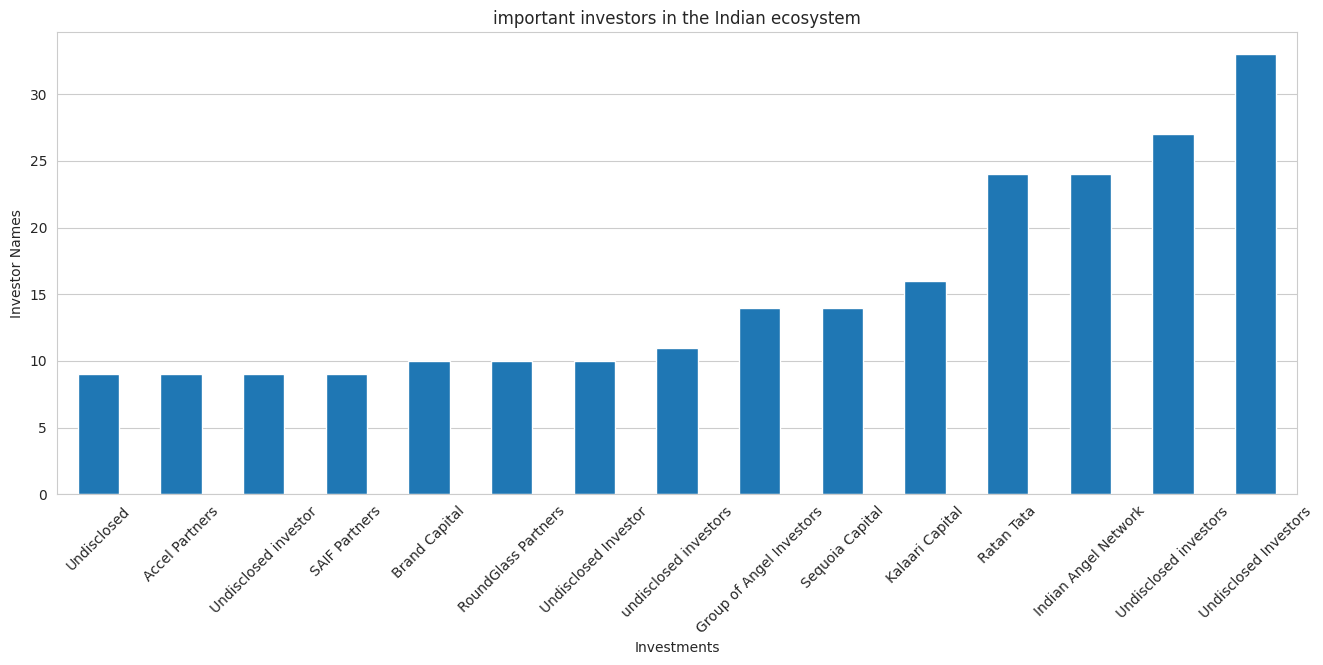

In [39]:
plt.figure(figsize=(16, 6))
top15_inverstors.sort_values().plot(kind='bar')
plt.title('important investors in the Indian ecosystem')
plt.xlabel('Investments')
plt.ylabel('Investor Names')
plt.grid(axis='x')
plt.xticks(rotation=45)
plt.show()

Top 10 Investment Types

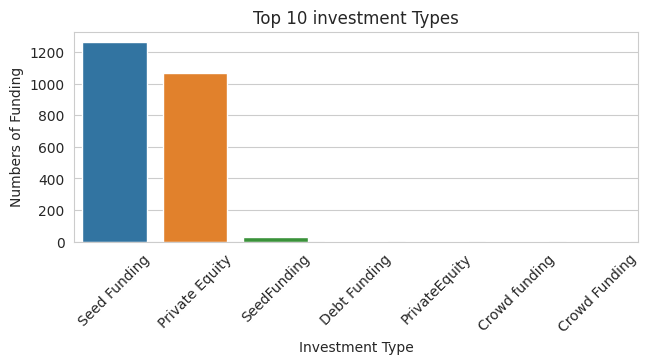

In [40]:
investment = df.InvestmentType.value_counts()
plt.figure(figsize=(16, 6))
plt.subplot(221)
sns.barplot(x=investment.index[:10], y=investment.values[:10])
plt.title('Top 10 investment Types')
plt.xlabel('Investment Type')
plt.ylabel('Numbers of Funding')
plt.xticks(rotation=45)
plt.show()

How much funds does startups generally get in India?

In [41]:
df['Amount'].mean()

12068030.576315789

In [42]:
df['Amount'].sort_values(ascending= False).head()

158     1.400000e+09
294     1.400000e+09
1976    7.000000e+08
1787    6.800000e+08
1572    5.000000e+08
Name: Amount, dtype: float64

In [43]:
df.sort_values(by='Amount', ascending= False).head()

,Date,Startup Name,Industry vertical,Sub vertical,City,Investors,InvestmentType,Amount,Year
158,2017-05-18,Paytm,ECommerce,Mobile Wallet & ECommerce platform,Bangalore,SoftBank Group,Private Equity,1.400000e+09,2017
294,2017-03-21,Flipkart,eCommerce,ECommerce Marketplace,Bangalore,"Microsoft, eBay, Tencent Holdings",Private Equity,1.400000e+09,2017
1976,2015-07-28,Flipkart.com,Online Marketplace,NaN,Bangalore,Steadview Capital and existing investors,Private Equity,7.000000e+08,2015
1787,2015-09-29,Paytm,E-Commerce & M-Commerce platform,NaN,New Delhi,"Alibaba Group, Ant Financial",Private Equity,6.800000e+08,2015
1572,2015-11-18,Ola,Car Aggregator & Retail Mobile App,NaN,Bangalore,"Baillie Gifford, Falcon Edge Capital, Tiger Gl...",Private Equity,5.000000e+08,2015


In [44]:
df['Amount'].sort_values().head(5)

2349    16000.0
2348    16000.0
2347    16000.0
2346    16000.0
2345    16000.0
Name: Amount, dtype: float64

In [47]:
df.sort_values(by = 'Amount').head(5)

,Date,Startup Name,Industry vertical,Sub vertical,City,Investors,InvestmentType,Amount,Year
2349,2015-01-19,CBS,NaN,NaN,NaN,Hyderabad Angels (at Startup Heroes event),Seed Funding,16000.0,2015
2348,2015-01-19,Enabli,NaN,NaN,NaN,Hyderabad Angels (at Startup Heroes event),Seed Funding,16000.0,2015
2347,2015-01-19,Yo Grad,NaN,NaN,NaN,Hyderabad Angels (at Startup Heroes event),Seed Funding,16000.0,2015
2346,2015-01-19,Play your sport,NaN,NaN,NaN,Hyderabad Angels (at Startup Heroes event),Seed Funding,16000.0,2015
2345,2015-01-19,Hostel Dunia,NaN,NaN,NaN,Hyderabad Angels (at Startup Heroes event),Seed Funding,16000.0,2015


how much investers can funding on a particular startup companies?

In [54]:
df.describe()

,Amount,Year
count,1.520000e+03,2366.000000
mean,1.206803e+07,2015.794167
std,6.413321e+07,0.733597
min,1.600000e+04,2015.000000
25%,3.695000e+05,2015.000000
50%,1.100000e+06,2016.000000
75%,6.000000e+06,2016.000000
max,1.400000e+09,2017.000000
